In [27]:
#주소 test

In [28]:
import pandas as pd
from glob import glob

In [29]:
glob('../data5/현재 판매가격(주유소)20180508-20180507.xls')

['../data5/현재 판매가격(주유소)20180508-20180507.xls']

In [30]:
stations_files=glob('../data5/현재 판매가격(주유소)20180508-20180507.xls')
stations_files

['../data5/현재 판매가격(주유소)20180508-20180507.xls']

In [31]:
tmp_raw=[]

for file_name in stations_files:
    tmp=pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw=pd.concat(tmp_raw)

In [32]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11676 entries, 0 to 11675
Data columns (total 10 columns):
지역       11676 non-null object
상호       11676 non-null object
주소       11676 non-null object
상표       11676 non-null object
전화번호     0 non-null float64
셀프여부     11676 non-null object
고급휘발유    11676 non-null int64
휘발유      11676 non-null object
경유       11676 non-null int64
실내등유     11676 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 912.3+ KB


In [33]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울 종로구,(주)지에스이앤알 평창주유소,서울특별시 종로구 평창문화로 135 (평창동),현대오일뱅크,NaN,N,0,1639,1439,0
1,서울 종로구,SK북악주유소,서울 종로구 평창문화로 137 (평창동),SK에너지,NaN,N,2289,1969,1769,1288
2,서울 종로구,경복궁주유소,서울 종로구 율곡로 6 (중학동),GS칼텍스,NaN,N,2388,1998,1933,0
3,서울 종로구,재동주유소,서울특별시 종로구 율곡로 58 (경운동),SK에너지,NaN,N,0,2147,1957,1323
4,서울 종로구,(주)마봉 안풍주유소,서울특별시 종로구 자하문로 303 (홍지동),S-OIL,NaN,N,0,1960,1760,1199


In [34]:
stations=pd.DataFrame({'Oil_store':station_raw['상호'],
                       '주소':station_raw['주소'],
                       '가격':station_raw['휘발유'],
                       '셀프':station_raw['셀프여부'],
                       '상표':station_raw['상표']})
stations.head()

,Oil_store,가격,상표,셀프,주소
0,(주)지에스이앤알 평창주유소,1639,현대오일뱅크,N,서울특별시 종로구 평창문화로 135 (평창동)
1,SK북악주유소,1969,SK에너지,N,서울 종로구 평창문화로 137 (평창동)
2,경복궁주유소,1998,GS칼텍스,N,서울 종로구 율곡로 6 (중학동)
3,재동주유소,2147,SK에너지,N,서울특별시 종로구 율곡로 58 (경운동)
4,(주)마봉 안풍주유소,1960,S-OIL,N,서울특별시 종로구 자하문로 303 (홍지동)


In [35]:
stations['지역']=[eachAddress.split()[0] for eachAddress in stations['주소']]
stations.head()

,Oil_store,가격,상표,셀프,주소,지역
0,(주)지에스이앤알 평창주유소,1639,현대오일뱅크,N,서울특별시 종로구 평창문화로 135 (평창동),서울특별시
1,SK북악주유소,1969,SK에너지,N,서울 종로구 평창문화로 137 (평창동),서울
2,경복궁주유소,1998,GS칼텍스,N,서울 종로구 율곡로 6 (중학동),서울
3,재동주유소,2147,SK에너지,N,서울특별시 종로구 율곡로 58 (경운동),서울특별시
4,(주)마봉 안풍주유소,1960,S-OIL,N,서울특별시 종로구 자하문로 303 (홍지동),서울특별시


In [36]:
stations['지역'].unique()

array(['서울특별시', '서울', '서울시', '1', '경기도', '경기', '안양시', '경기화성시', '강원',
       '강원도', '도로명주소강원도', '원', '충북', '충청북도', '충청남도', '충남', '논산시', '충청',
       '전북', '전라북도', '전라', '전남', '전라남도', '도로명주소전라남도', '경상북도', '경북', '경남',
       '경상남도', '인천광역시', '부산', '부산광역시', '제주', '제주특별자치도', '제주시', '대구',
       '대구광역시', '인천', '인천시', '인청광역시', '광주광역시', '광주', '광주시', '대전광역시', '대전',
       '대전시', '울산광역시', '울산', '세종특별자치시'], dtype=object)

In [37]:
stations[stations['가격']=='-']

,Oil_store,가격,상표,셀프,주소,지역
2037,기영주유소,-,SK에너지,N,경기 화성시 향남읍 은행나무로 627,경기
2162,(주)충만에너지 은수포주유소,-,S-OIL,N,경기 화성시 서신면 당성로 269,경기
2220,(주)디엔에이치,-,자가상표,N,경기도 화성시 남양읍 남양로 1671-36,경기도
2460,금주산주유소,-,자가상표,N,경기 포천시 영중면 영일로 201,경기
2535,진성주유소,-,현대오일뱅크,N,경기도 포천시 내촌면 포천로 298,경기도
2545,스마일에너지,-,자가상표,N,경기 포천시 가산면 부흥로 656,경기
2637,석산주유소,-,현대오일뱅크,N,경기 양평군 단월면 한서로 1373,경기
2761,새아침주유소,-,GS칼텍스,N,경기 안성시 원곡면 청원로 1815,경기
2944,씨제이대한통운(주)강원주유소,-,알뜰주유소,N,강원도 원주시 흥업면 원문로 898,강원도
3050,(주)동원에너지산업 석산주유소,-,SK에너지,N,강원도 원주시 귀래면 고청길 70,강원도


In [38]:
stations=stations[stations['가격']!='-']
stations.head()

,Oil_store,가격,상표,셀프,주소,지역
0,(주)지에스이앤알 평창주유소,1639,현대오일뱅크,N,서울특별시 종로구 평창문화로 135 (평창동),서울특별시
1,SK북악주유소,1969,SK에너지,N,서울 종로구 평창문화로 137 (평창동),서울
2,경복궁주유소,1998,GS칼텍스,N,서울 종로구 율곡로 6 (중학동),서울
3,재동주유소,2147,SK에너지,N,서울특별시 종로구 율곡로 58 (경운동),서울특별시
4,(주)마봉 안풍주유소,1960,S-OIL,N,서울특별시 종로구 자하문로 303 (홍지동),서울특별시


In [39]:
stations['가격']=[float(value) for value in stations['가격']]

In [40]:
stations.reset_index(inplace=True)
del stations['index']

In [41]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11629 entries, 0 to 11628
Data columns (total 6 columns):
Oil_store    11629 non-null object
가격           11629 non-null float64
상표           11629 non-null object
셀프           11629 non-null object
주소           11629 non-null object
지역           11629 non-null object
dtypes: float64(1), object(5)
memory usage: 545.2+ KB


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.. sorry~~~~')

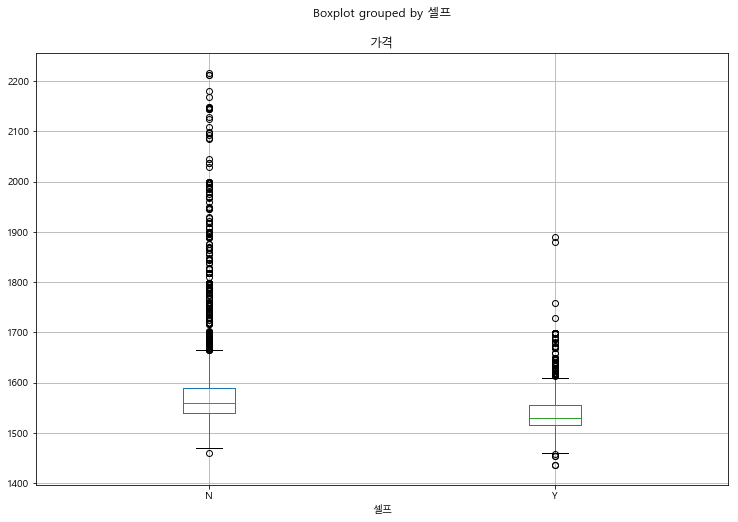

In [43]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

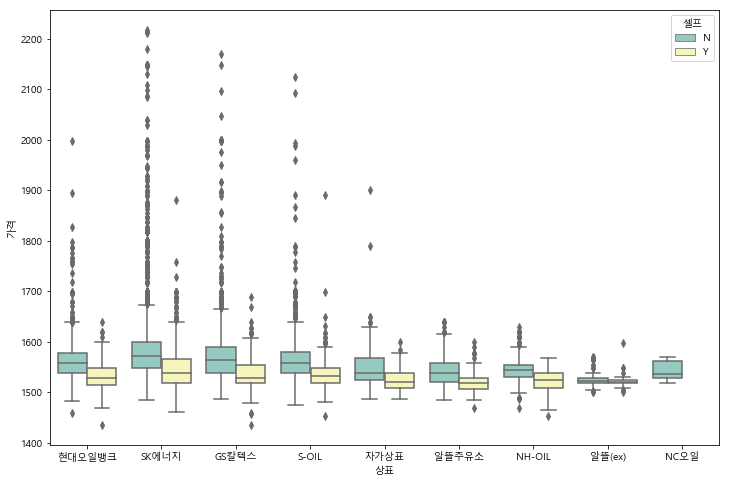

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

In [45]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [46]:
stations.sort_values(by="가격", ascending=False).head(10)

,Oil_store,가격,상표,셀프,주소,지역
9,서남주유소,2217.0,SK에너지,N,서울 중구 통일로 30 (봉래동1가),서울
19,장충주유소,2213.0,SK에너지,N,서울 중구 장충단로 202 (장충동1가),서울
439,양재주유소,2212.0,SK에너지,N,서울 서초구 바우뫼로 178 (양재동),서울
224,뉴서울(강남),2180.0,SK에너지,N,서울 강남구 언주로 716 (논현동),서울
11,필동주유소,2169.0,GS칼텍스,N,서울특별시 중구 퇴계로 196 (필동2가),서울특별시
6,(주)중앙에너비스혜화주유소,2148.0,SK에너지,N,서울 종로구 창경궁로35길 1 (혜화동),서울
7,(주)대양씨앤씨,2148.0,GS칼텍스,N,서울 종로구 사직로 65 (사직동),서울
229,동우주유소,2147.0,SK에너지,N,서울특별시 강남구 봉은사로 311 (논현동),서울특별시
218,삼성주유소,2147.0,SK에너지,N,서울 강남구 삼성로 521 (삼성동),서울
3,재동주유소,2147.0,SK에너지,N,서울특별시 종로구 율곡로 58 (경운동),서울특별시


In [47]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,가격,상표,셀프,주소,지역
8246,(주)제이엠제7주유소지점,1435.0,GS칼텍스,Y,경북 칠곡군 왜관읍 강변대로 852,경북
8205,미소가득주유소,1435.0,현대오일뱅크,Y,경상북도 칠곡군 왜관읍 강변대로 830,경상북도
8924,에코주유소,1453.0,S-OIL,Y,경남 김해시 장유로 581-1 (응달동),경남
8856,장유농협주유소,1453.0,NH-OIL,Y,경상남도 김해시 장유로 415 (신문동),경상남도
10822,(주)대원주유소,1457.0,GS칼텍스,Y,광주 서구 천변좌하로 142 (치평동),광주
8228,강나루주유소,1459.0,GS칼텍스,Y,경북 칠곡군 왜관읍 강변대로 853,경북
10834,반디석유시청점,1460.0,현대오일뱅크,N,광주 서구 천변좌하로 160 (치평동),광주
7717,신동이룸주유소,1462.0,SK에너지,Y,경상북도 구미시 인동가산로 453 (신동),경상북도
8854,영남화훼원예농협주유소,1465.0,NH-OIL,Y,경상남도 김해시 분성로 465 (삼정동),경상남도
8855,김해농협주유소,1469.0,NH-OIL,Y,경남 김해시 삼정동 김해대로 2476,경남


In [48]:
import numpy as np
gu_data=pd.pivot_table(stations, index=["지역"], values=["가격"],
                      aggfunc=np.mean)
gu_data.head()

,가격
지역,
1,1699.000000
강원,1574.317427
강원도,1562.235294
경기,1580.770132
경기도,1563.230928


In [49]:
geo_path='../data3/05. skorea_municipalities_geo_simple.json'
geo_data=json.load(open(geo_path, encoding='utf-8'))

map=folium.Map(location=[36.2002, 127.054], zoom_start=7,
              tiles='Stamen Toner')
map.choropleth(geo_data=geo_data,
              data=gu_data,
              columns=[gu_data.index, '가격'],
              fill_color='YlGnBu', #PuRd, YlGnBu
               key_on='feature.id')
map